# NIN Architecture

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers

In [ ]:
# MLP Convolution Layer
def mlpconv(x, filters, kernel_size, strides=(1, 1), padding='same'):
    # CONV1 (5x5 filter)
    x = layers.Conv2D(filters, kernel_size, strides=strides, padding=padding)(x)
    x = layers.ReLU()(x)
    # CONV2 (1x1 filter)
    x = layers.Conv2D(filters, (1, 1), padding='same')(x)
    x = layers.ReLU()(x)
    # CONV3 (1x1 filter)
    x = layers.Conv2D(filters, (1, 1), padding='same')(x)
    x = layers.ReLU()(x)
    return x

In [ ]:
# NIN Model
def build_nin_model(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)

    # MLP-CONV1
    x = mlpconv(inputs, filters=192, kernel_size=(5, 5))
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    x = layers.Dropout(0.5)(x)

    # MLP-CONV2
    x = mlpconv(x, filters=160, kernel_size=(5, 5))
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    x = layers.Dropout(0.5)(x)

    # MLP-CONV3
    x = mlpconv(x, filters=96, kernel_size=(3, 3))
    x = layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    x = layers.Dropout(0.5)(x)

    # Global Average Pooling
    x = layers.GlobalAveragePooling2D()(x)
    # Softmax
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create the Model
    model = models.Model(inputs=inputs, outputs=outputs)

    return model

In [ ]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel 0-1
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encoding
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
input_shape = train_images.shape[1:]
num_classes = 10

In [ ]:
# Model Build
model = build_nin_model(input_shape, num_classes)

In [ ]:
# Compile
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 192)         │          14,592 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 32, 32, 192)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 192)         │          37,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 32, 32, 192)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 192)         │          37,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 32, 32, 192)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 192)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 192)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 160)         │         768,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 16, 16, 160)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 160)         │          25,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 16, 16, 160)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 160)         │          25,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_5 (ReLU)                       │ (None, 16, 16, 160)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 160)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 160)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 8, 8, 96)            │         138,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_6 (ReLU)                       │ (None, 8, 8, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 96)            │           9,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_7 (ReLU)                       │ (None, 8, 8, 96)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,066,314 (4.07 MB)

 Trainable params: 1,066,314 (4.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training
history = model.fit(train_images, train_labels, epochs=200, batch_size=128,
                        validation_data=(test_images, test_labels),
                    )

Epoch 1/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 49s 94ms/step - accuracy: 0.1770 - loss: 2.3728 - val_accuracy: 0.3169 - val_loss: 1.9131
Epoch 2/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 62s 64ms/step - accuracy: 0.2985 - loss: 1.8970 - val_accuracy: 0.3389 - val_loss: 1.7998
Epoch 3/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 42s 66ms/step - accuracy: 0.3445 - loss: 1.7976 - val_accuracy: 0.3934 - val_loss: 1.6959
Epoch 4/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 67ms/step - accuracy: 0.3795 - loss: 1.7169 - val_accuracy: 0.4034 - val_loss: 1.6872
Epoch 5/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 41s 66ms/step - accuracy: 0.4048 - loss: 1.6689 - val_accuracy: 0.4457 - val_loss: 1.5801
Epoch 6/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.4312 - loss: 1.6102 - val_accuracy: 0.4684 - val_loss: 1.5101
Epoch 7/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - accuracy: 0.4661 - loss: 1.5480 - val_accuracy: 0.5081 - val_loss: 1.4377
Epoch 8/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 67ms/step - accuracy: 0.4908 - loss: 1

In [ ]:
# Evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 3s - 9ms/step - accuracy: 0.8124 - loss: 0.8126

Test accuracy: 0.8123999834060669


# Visualization

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

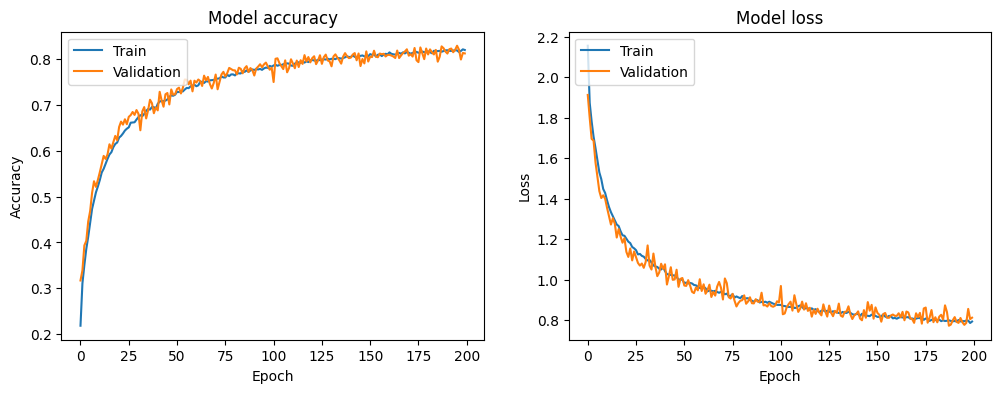

In [ ]:
plot_history(history)